In [19]:
from main.compiling.compilers.AncillaPerCheckCompiler import AncillaPerCheckCompiler
from main.compiling.noise.models.CircuitLevelNoise import CircuitLevelNoise
from main.compiling.syndrome_extraction.extractors.ancilla_per_check.mixed.CxCyCzExtractor import CxCyCzExtractor
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.gauge_honeycomb_code import GaugeHoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
from main.codes.tic_tac_toe.TicTacToeCode import TicTacToeCode
from main.utils.enums import State
from main.building_blocks.pauli import Pauli
from main.building_blocks.pauli.PauliLetter import PauliLetter
import stim
import sinter 
import matplotlib.pyplot as plt
import numpy as np
from beliefmatching import BeliefMatchingSinterDecoder
from main.utils.Colour import Blue, Green, Red


# Load data

In [22]:
#gauge_hcc_X0_samples = sinter.stats_from_csv_files('resume/GaugeHoneycombCodeX_0_2.json')
#hcc_X0_samples = sinter.stats_from_csv_files('resume/HoneycombCodeX_0_4.json')

gauge_hcc_X1_samples = sinter.stats_from_csv_files('resume/GaugeHoneycombCodeX_1_2.json')
gauge_hcc_X0_samples = sinter.stats_from_csv_files('resume/GaugeHoneycombCodeX_0_2.json')
gauge_fc_X1_samples = sinter.stats_from_csv_files('resume/GaugeFloquetColourCodeX_1_2.json')
hcc_X1_samples = sinter.stats_from_csv_files('resume/HoneycombCodeX_1_4.json')
hcc_X1_samples_bm = sinter.stats_from_csv_files('resume/HoneycombCodeX_1_4_belief_matching.json')

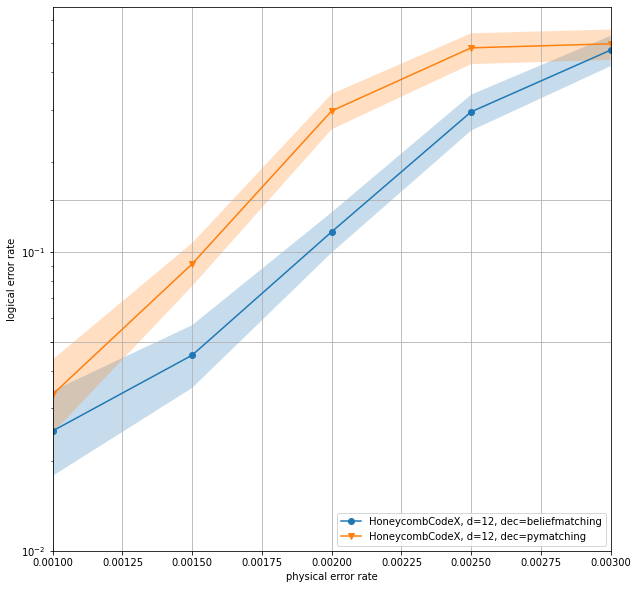

In [23]:
fig, axis = plt.subplots(1, 1,figsize=(10,10))
"""
sinter.plot_error_rate(
        ax=axis,
        stats=hcc_X1_samples_bm,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder} new",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])
"""
sinter.plot_error_rate(
        ax=axis,
        stats=hcc_X1_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda d: d.json_metadata['distance'] == 12,
           #filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'] )

axis.set_xlim(0.001, 0.003)
axis.set_yscale('log')
axis.set_xlabel('physical error rate')
axis.set_ylabel('logical error rate')
axis.legend(loc='lower right')
# add more ticks to the y-axis
axis.set_yticks([0.01,0.05, 0.1,0.15])
axis.grid()

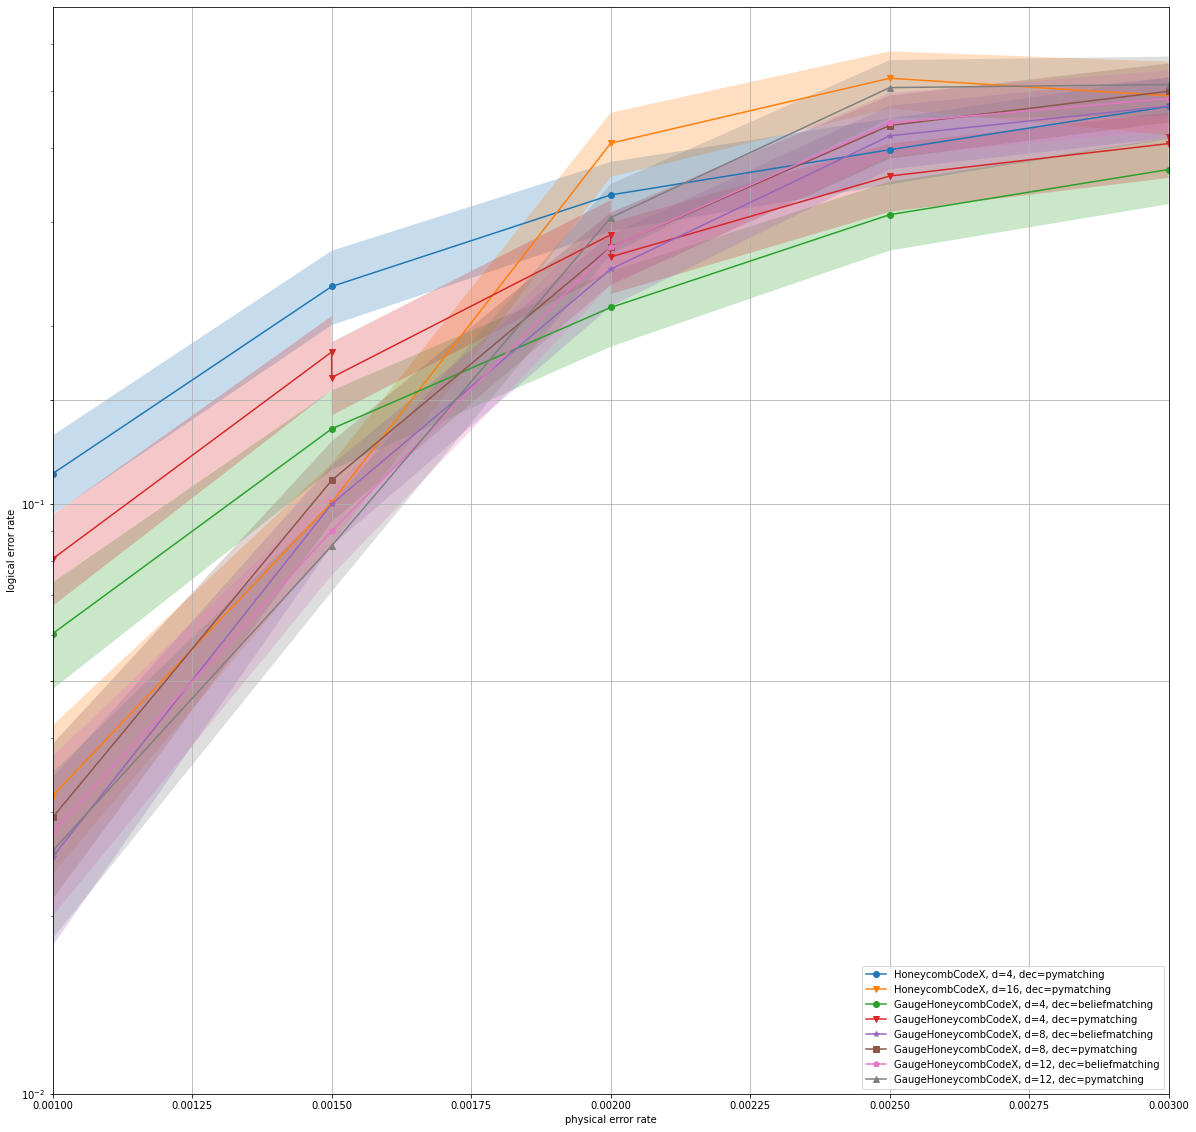

In [18]:
fig, axis = plt.subplots(1, 1,figsize=(20,20))


sinter.plot_error_rate(
        ax=axis,
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
#        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis,
        stats=gauge_hcc_X1_samples,
        group_func=lambda stat: f"GaugeHoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
#        filter_func=lambda d: d.json_metadata['distance'] == 12,
        #filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])


axis.set_xlim(0.001, 0.003)
axis.set_yscale('log')
axis.set_xlabel('physical error rate')
axis.set_ylabel('logical error rate')
axis.legend(loc='lower right')
# add more ticks to the y-axis
axis.set_yticks([0.01,0.05, 0.1,0.15])
axis.grid()

# Help functions

In [11]:
circuit = get_X_stim_circuit(HoneycombCode(5), 0,8,0.1)
circuit2 = get_X_stim_circuit(GaugeHoneycombCode(5),0, 2, 0.1)

NameError: name 'get_X_stim_circuit' is not defined

In [12]:

def dem_histogram(dem):
    weight_dict = dict()
    total_errors = 0
    for dem_object in dem:
        if dem_object.type == "error":
            detector_ids = set()
            observable_ids = set()
            if len(dem_object.targets_copy()) in weight_dict:
                weight_dict[len(dem_object.targets_copy())] += 1
            else:
                weight_dict[len(dem_object.targets_copy())] = 1
            total_errors += 1
            #for target in dem_object.targets_copy():
            #    print('+1')

    print(weight_dict, total_errors)

dem_histogram(circuit.detector_error_model(approximate_disjoint_errors=True))
dem_histogram(circuit2.detector_error_model(approximate_disjoint_errors=True))


NameError: name 'circuit' is not defined

In [13]:
gauge_hcc_X0_samples = calculate_threshold('GaugeHoneycombCodeX',[4,8,12], 1,2,np.linspace(0.001,0.003, 5))
# and save data

NameError: name 'calculate_threshold' is not defined

In [37]:
hcc_X0_samples = calculate_threshold('HoneycombCodeX',[4,8,12],1,4,np.linspace(0.001,0.003,5))
#hcc_X1_samples = calculate_threshold('HoneycombCodeX',[4,8,12],1,2,np.logspace(-2.2,-1.9,10))

|████████████████████████████████████████✗︎ (!) 387/339 [114%] in 0.4s (872.64/s)                                        
|████████████████████████████████████████✗︎ (!) 387/339 [114%] in 0.3s (1283.02/s)                                       
|████████████████████████████████████████✗︎ (!) 387/339 [114%] in 0.3s (1334.71/s)                                       
|████████████████████████████████████████✗︎ (!) 387/339 [114%] in 0.3s (1381.70/s)                                       
|████████████████████████████████████████✗︎ (!) 387/339 [114%] in 0.3s (1364.29/s)                                       
|████████████████████████████████████████✗︎ (!) 771/675 [114%] in 2.2s (343.30/s)                                        █▆▄ 238/675 [35%] in 1s (228.3/s, eta: 3s)  536/675 [79%] in 2s (318.4/s, eta: 1s)  ▁▃▅ 591/675 [88%] in 2s (327.3/s, eta: 0s) 
|████████████████████████████████████████✗︎ (!) 771/675 [114%] in 2.3s (331.76/s)                                        /675 [50%] in 1s (24

Starting workers...
Finding work...
15 cases left:
        pymatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.001}
    beliefmatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.001}
        pymatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.0015}
    beliefmatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.0015}
        pymatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.002}
    beliefmatching processes=1  ~core_mins_left=None    shots_left=5000     errors_left=500     {code=HoneycombCodeX,distance=4,layers=16,p=0.002}
        pymatching processes=1  ~core_mins_left=None    shots_lef

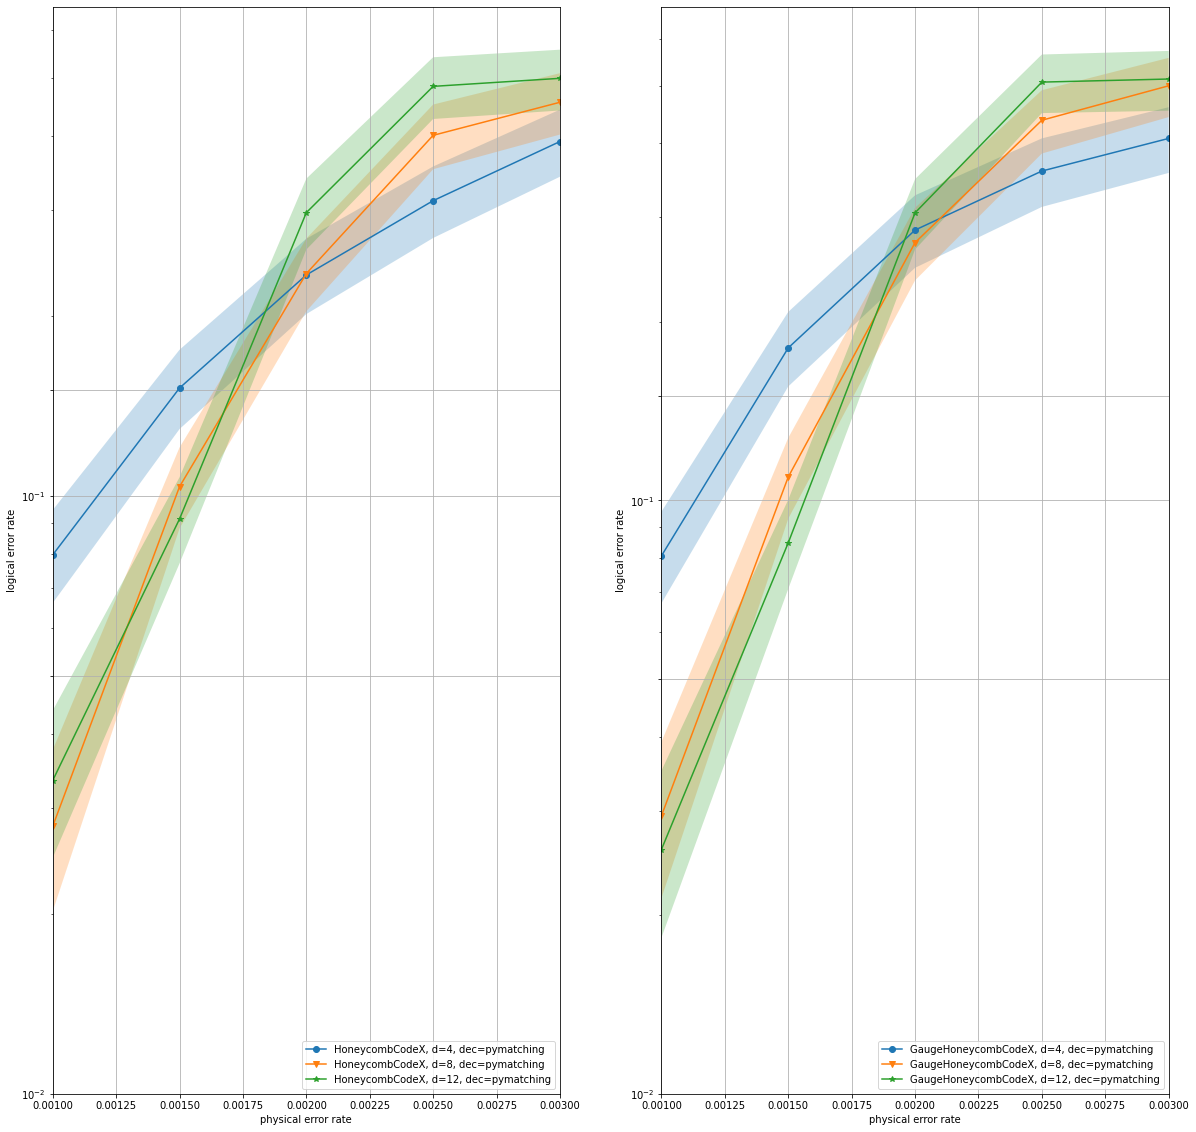

In [47]:
fig, axis = plt.subplots(1, 2,figsize=(20,20))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"GaugeHoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
# add a grid to the plot
for ax in axis:
    ax.set_xlim(0.001, 0.003)
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    # add more ticks to the y-axis
    ax.set_yticks([0.01,0.05, 0.1,0.15])
    ax.grid()

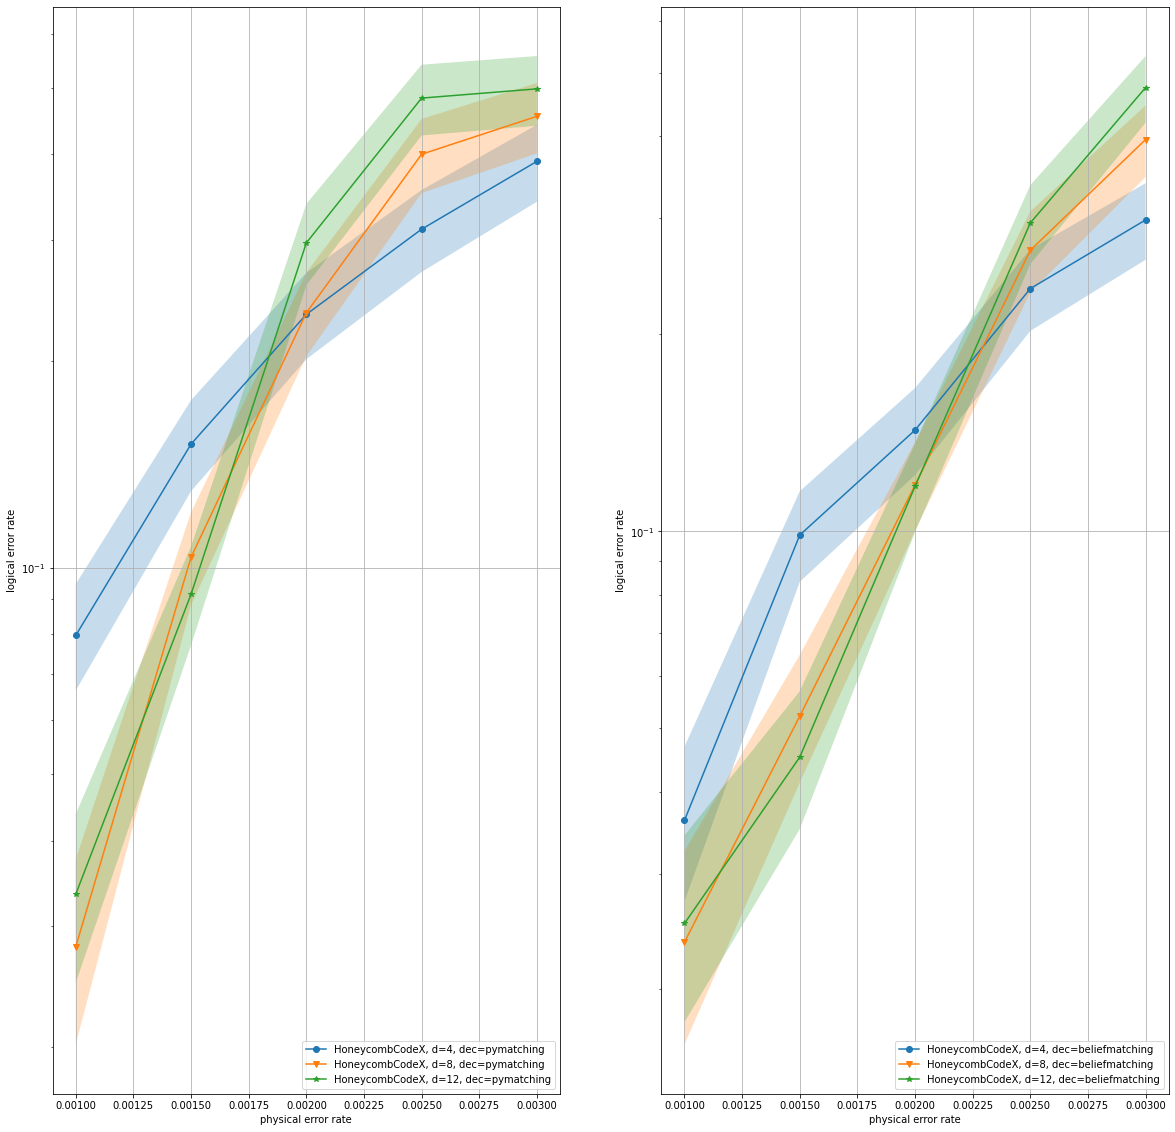

In [49]:
fig, axis = plt.subplots(1, 2,figsize=(20,20))
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    ax.grid()

NameError: name 'gauge_hcc_X0_samples' is not defined

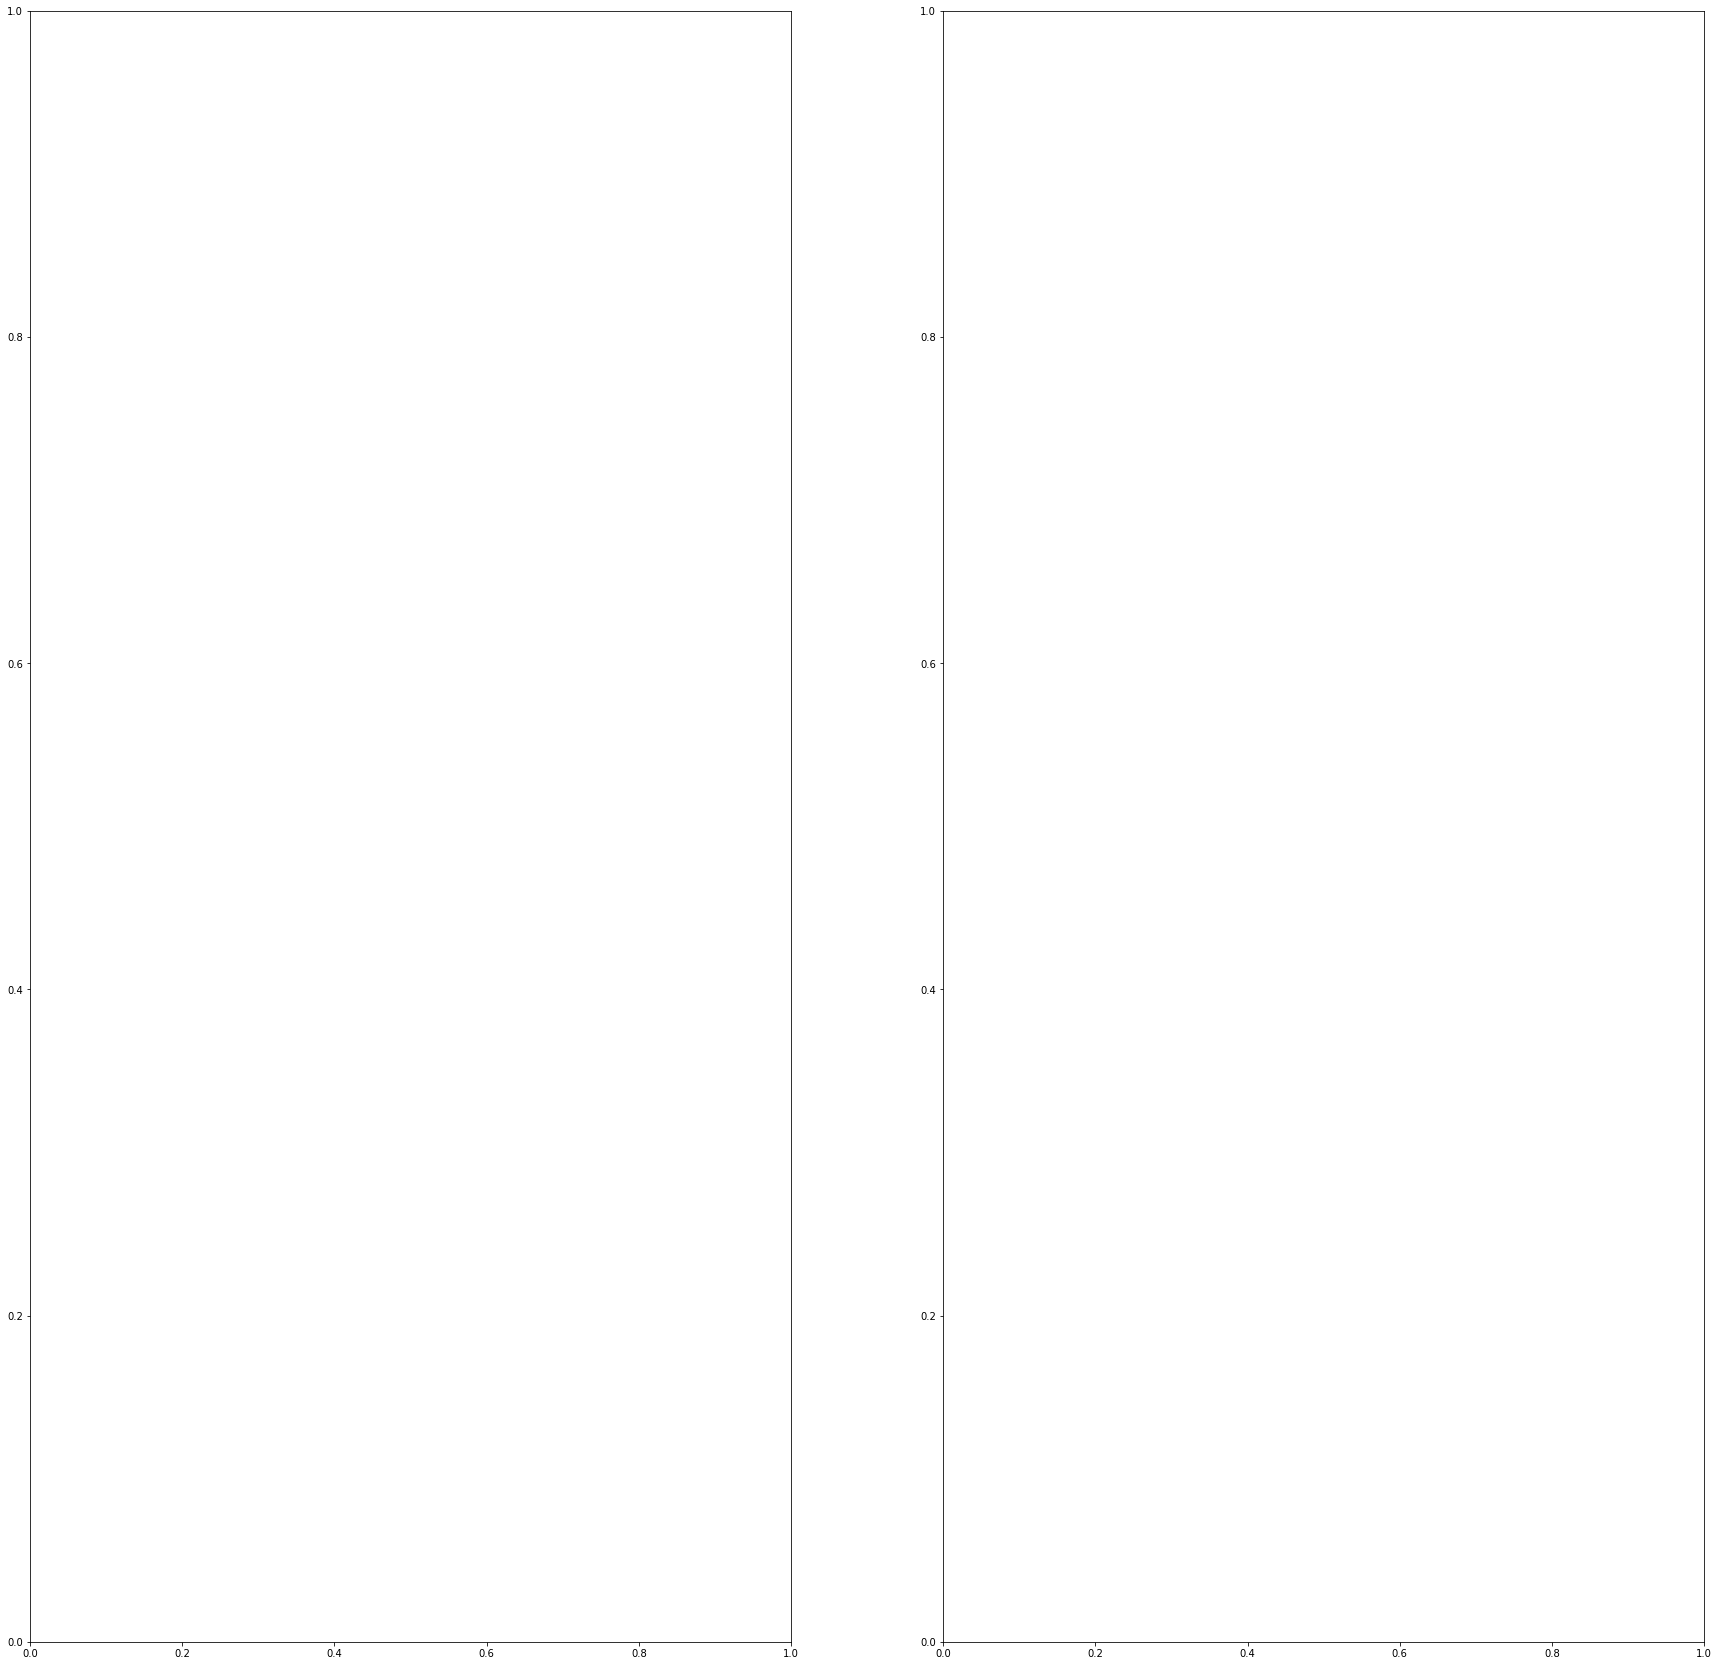

In [34]:
fig, axis = plt.subplots(1, 2,figsize=(30,30))
sinter.plot_error_rate(
        ax=axis[0],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        #filter_func=lambda s: s.decoder == 'pymatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

#print(hcc_samples)
for ax in axis:
    ax.set_yscale('log')
    ax.set_xlabel('physical error rate')
    ax.set_ylabel('logical error rate')
    ax.legend(loc='lower right')
    ax.grid()

In [19]:
sinter.plot_error_rate(
        ax=axis[0],
        stats=hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

sinter.plot_error_rate(
        ax=axis[1],
        stats=gauge_hcc_X0_samples,
        group_func=lambda stat: f"HoneycombCodeX, d={stat.json_metadata['distance']}, dec={stat.decoder}",
        filter_func=lambda s: s.decoder == 'beliefmatching',
        x_func=lambda stat: stat.json_metadata['p'])

In [ ]:
hcc_circuit.detector_error_model(decompose_errors=True, approximate_disjoint_errors=True).diagram(type="match-graph-3d")

In [12]:
hcc_Z0_samples = calculate_threshold('HoneycombCodeZ',[4,8,12],0,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))
hcc_Z1_samples = calculate_threshold('HoneycombCodeZ',[4,8,12],1,2,np.zeros(10), np.zeros(10),np.logspace(-2.2,-1.9,10),np.zeros(10))

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.5s (410.29/s)                                        ta: 0s) 
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (563.92/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (610.27/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (718.99/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (709.17/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (699.80/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (664.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (622.34/s)                                        
|███████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers

|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (728.45/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (710.03/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (726.22/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (712.66/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (725.65/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (724.16/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.2s (795.35/s)                                        
|████████████████████████████████████████✗︎ (!) 195/194 [101%] in 0.3s (778.50/s)                                        
|███████████████████████

Starting workers...
30 cases left:
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.00630957344480193}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.006812920690579608}
        pymatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers=8,mer=0.0,per_x=0.0,per_y=0.0,per_z=0.007356422544596414}
    beliefmatching processes=1  ~core_mins_left=None    (initializing...) {code=HoneycombCodeZ,distance=4,layers